In [174]:
import pandas as pd

In [175]:
df = pd.read_csv("data/HealthCare  Mini- Project/diabetes.csv")

In [176]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [178]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Features
#### Pregnancies: Number of times pregnant
#### Glucose: Plasma glucose concentration 2 hours after an oral glucose tolerance test
#### BloodPressure: Diastolic blood pressure (mm Hg)
#### SkinThickness: Triceps skinfold thickness (mm)
#### Insulin: 2-Hour serum insulin (mu U/ml)
#### BMI: Body mass index (weight in kg/(height in m)^2)
#### DiabetesPedigreeFunction: It is a numerical score that estimates the genetic risk of diabetes based on family history. It considers the prevalence of diabetes among relatives to assess an individual's likelihood of developing the condition. A higher DPF score indicates a greater genetic predisposition to diabetes.
#### Age: Age (years)
#### Outcome: Class variable (0 or 1)

In [179]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [180]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [181]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [182]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [184]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
619,0,119,0,0,0,32.4,0.141,24
368,3,81,86,16,66,27.5,0.306,22
65,5,99,74,27,0,29.0,0.203,32
535,4,132,0,0,0,32.9,0.302,23
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
567,6,92,62,32,126,32.0,0.085,46
58,0,146,82,0,0,40.5,1.781,44
492,4,99,68,38,0,32.8,0.145,33
546,5,187,76,27,207,43.6,1.034,53


In [185]:
y_train

619    1
368    0
65     0
535    1
4      1
      ..
567    0
58     0
492    0
546    1
160    0
Name: Outcome, Length: 614, dtype: int64

### Using Standard Scaler

In [186]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_scaled = pd.DataFrame(std_scaler.transform(X_train),
                              columns=X_train.columns)
X_test_scaled = pd.DataFrame(std_scaler.transform(X_test),
                              columns=X_test.columns)

In [187]:
X_train_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.153626,-0.045270,-3.641380,-1.260066,-0.703480,0.060223,-0.978742,-0.802349
1,-0.265999,-1.242824,0.865768,-0.262332,-0.108997,-0.571309,-0.483982,-0.971874
2,0.325752,-0.675562,0.236863,0.423610,-0.703480,-0.377983,-0.792832,-0.124245
3,0.029877,0.364419,-3.641380,-1.260066,-0.703480,0.124665,-0.495976,-0.887111
4,-1.153626,0.521992,-1.545032,0.922478,0.809749,1.439283,5.459137,-0.039482
...,...,...,...,...,...,...,...,...
609,0.621628,-0.896164,-0.392041,0.735402,0.431442,0.008669,-1.146661,1.062435
610,-1.153626,0.805624,0.656133,-1.260066,-0.703480,1.104184,3.938874,0.892910
611,0.029877,-0.675562,-0.077589,1.109553,-0.703480,0.111777,-0.966748,-0.039482
612,0.325752,2.097722,0.341681,0.423610,1.161035,1.503725,1.698960,1.655776


In [188]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
173,1,79,60,42,48,43.5,0.678,23
84,5,137,108,0,0,48.8,0.227,37
60,2,84,0,0,0,0.0,0.304,21
207,5,162,104,0,0,37.7,0.151,52
466,0,74,52,10,36,27.8,0.269,22
...,...,...,...,...,...,...,...,...
304,3,150,76,0,0,21.0,0.207,37
330,8,118,72,19,0,23.1,1.476,46
655,2,155,52,27,540,38.7,0.240,25
652,5,123,74,40,77,34.1,0.269,28


## Logistic Regression

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
# Logistic on standard scaled Diabetes Data frame
lg_std = LogisticRegression()
lg_std.fit(X_train_scaled, y_train) #Fitting Model

LogisticRegression()

In [190]:
y_pred_lg_std = lg_std.predict(X_test_scaled) #Predicting

In [191]:
lg_std_cm = confusion_matrix(y_test, y_pred_lg_std)
lg_std_accuracy = accuracy_score(y_test, y_pred_lg_std)

In [192]:
# for standard sclaed data
print('Logistic Regression with Standard scaler: ')
print(lg_std_cm)
print('accuracy score for standard scaled logistic regression : ', lg_std_accuracy)
print('--------') 

Logistic Regression with Standard scaler: 
[[83  8]
 [26 37]]
accuracy score for standard scaled logistic regression :  0.7792207792207793
--------


In [193]:
accuracy_percent = lg_std_accuracy * 100
print("Accuracy Percentage is ",accuracy_percent)

Accuracy Percentage is  77.92207792207793


## Decision Tree

In [194]:
from sklearn.tree import DecisionTreeClassifier
dt_std = DecisionTreeClassifier()

In [195]:
dt_std.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [196]:
y_pred_dt_std = dt_std.predict(X_test_scaled) #Predicting

In [197]:
dt_std_cm = confusion_matrix(y_test, y_pred_dt_std)
dt_std_accuracy = accuracy_score(y_test, y_pred_dt_std)

In [198]:
# for standard sclaed data
print('Logistic Regression with Standard scaler: ')
print(dt_std_cm)
print('accuracy score for standard scaled logistic regression : ', dt_std_accuracy)
print('--------')  

Logistic Regression with Standard scaler: 
[[72 19]
 [28 35]]
accuracy score for standard scaled logistic regression :  0.6948051948051948
--------


## GaussianNB

In [199]:
from sklearn.naive_bayes import GaussianNB
nb_std = GaussianNB()

In [200]:
nb_std.fit(X_train_scaled, y_train)

GaussianNB()

In [201]:
y_pred_nb_std = nb_std.predict(X_test_scaled) #Predicting

In [202]:
nb_std_cm = confusion_matrix(y_test, y_pred_nb_std)
nb_std_accuracy = accuracy_score(y_test, y_pred_nb_std)

In [203]:
# for standard sclaed data
print('Logistic Regression with Standard scaler: ')
print(nb_std_cm)
print('accuracy score for standard scaled logistic regression : ', nb_std_accuracy)
print('--------')  

Logistic Regression with Standard scaler: 
[[83  8]
 [22 41]]
accuracy score for standard scaled logistic regression :  0.8051948051948052
--------


## SVM

In [204]:
from sklearn.svm import SVC
svc_std = SVC()

In [205]:
svc_std.fit(X_train_scaled, y_train)

SVC()

In [206]:
y_pred_svc_std = svc_std.predict(X_test_scaled) #Predicting

In [207]:
svc_std_cm = confusion_matrix(y_test, y_pred_svc_std)
svc_std_accuracy = accuracy_score(y_test, y_pred_svc_std)

In [208]:
# for standard sclaed data
print('Logistic Regression with Standard scaler: ')
print(svc_std_cm)
print('accuracy score for standard scaled logistic regression : ', svc_std_accuracy)
print('--------')  

Logistic Regression with Standard scaler: 
[[82  9]
 [31 32]]
accuracy score for standard scaled logistic regression :  0.7402597402597403
--------


In [209]:
accuracies_percent = [100 * i for i in accuracies]
print(accuracies_percent)

[74.02597402597402, 77.92207792207793, 75.97402597402598, 66.88311688311688]


## Comparing Model Accuracies

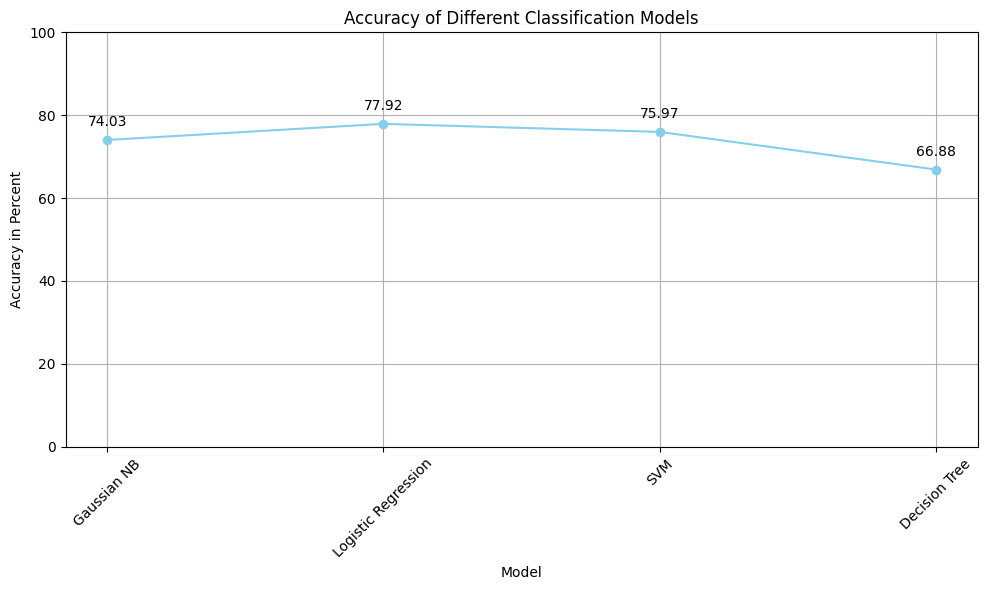

In [210]:
import matplotlib.pyplot as plt
# List of models
models = ['Gaussian NB', 'Logistic Regression', 'SVM', 'Decision Tree']
# List of accuracies
# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(models, accuracies_percent, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy in Percent')
plt.title('Accuracy of Different Classification Models')
plt.ylim(0, 100)  # Limiting y-axis from 0 to 100
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines
# Annotating the plot with accuracy scores
for i in range(len(models)):
    plt.annotate(f'{accuracies_percent[i]:.2f}', (models[i], accuracies_percent[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()